# Categorización de noticias

## Preguntas a responder con el anális
- ¿Se pueden catalogar las noticias con la descripción y los titulares? Compare su clasificación con las categorías incluidas en el set de datos.
- ¿Existen estilos de escritura asociados a cada categoría?
- ¿Qué se puede decir de los autores?
- ¿Qué información útil se puede extraer de los datos?

### Análisis exploratorio y carga de los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json("../Data/News_Category_Dataset_v2.json", lines = True, convert_dates = True)

In [3]:
df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [4]:
df.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://pubx.co/p...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


### Variable category

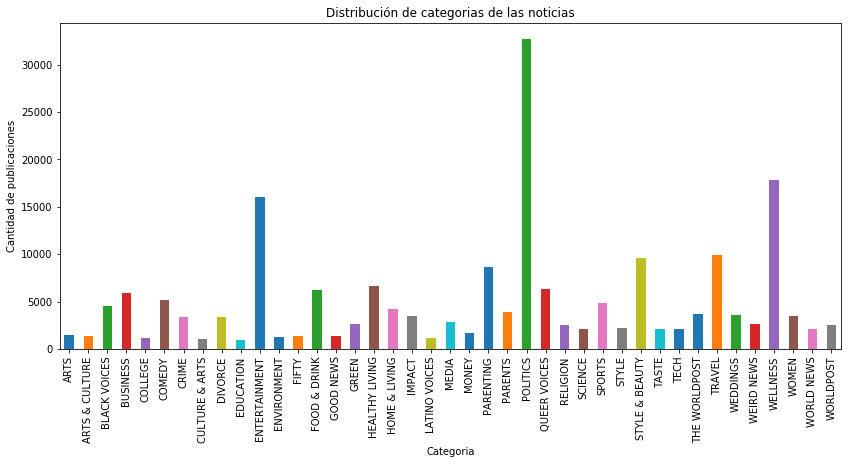

In [5]:
plt.figure(figsize=(14,6)) # tamaño del plot
df.groupby('category').link.count().plot.bar(ylim=0)
plt.xlabel("Categoria")
plt.ylabel("Cantidad de publicaciones")
plt.title("Distribución de categorias de las noticias")
plt.show()   

In [6]:
df["category"].nunique()

41

In [7]:
c1 = len(df[df['category'] == 'ENTERTAINMENT'])
c2 = len(df[df['category'] == 'POLITICS'])
c3 = len(df[df['category'] == 'WORLDPOST'])
print("ENTERTAINMENT = {} noticias, POLITICS = {} noticias, WORLDPOST = {}".format(c1, c2, c3))

ENTERTAINMENT = 16058 noticias, POLITICS = 32739 noticias, WORLDPOST = 2579


In [8]:
p = (c1 + c2 + c3)/len(df)*100
p = np.round(p, 2)
print("Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el {} % de las noticias,".format(p))
print("un total de {} noticias".format(c1 + c2 + c3))

Las categorias ENTERTAINMENT, POLITICS y WORLDPOST son el 25.58 % de las noticias,
un total de 51376 noticias


La variable **category** tiene 41 categorias pero nos estan distribuidas de manera uniforme *ENTERTAINMENT*, *POLITICS* y *WORLDPOST* tienen el 25.58% de todas las noticias

In [9]:
top_category = pd.DataFrame(pd.value_counts(df['category']))
top_category['Cat'] = top_category.index # organizar top categorias
top_category = top_category.reset_index(drop = True)
top_category.columns = ['Frecuencia', 'Categoria']
top_category = top_category.iloc[0:9]
top_category

,Frecuencia,Categoria
0,32739,POLITICS
1,17827,WELLNESS
2,16058,ENTERTAINMENT
3,9887,TRAVEL
4,9649,STYLE & BEAUTY
5,8677,PARENTING
6,6694,HEALTHY LIVING
7,6314,QUEER VOICES
8,6226,FOOD & DRINK


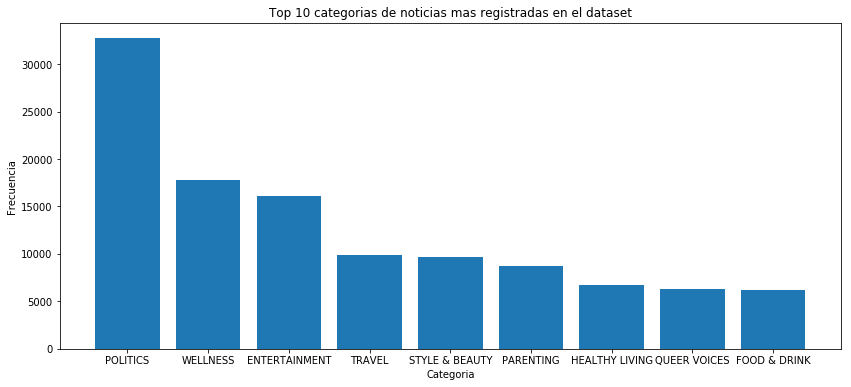

In [10]:
plt.figure(figsize=(14,6)) # tamaño del plot
plt.bar(top_category.Categoria, top_category.Frecuencia)
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')
plt.title('Top 10 categorias de noticias mas registradas en el dataset')
plt.show()

#### Variable  authors

In [11]:
df["authors"].nunique()

27993

In [12]:
pd.value_counts(df['authors'])

                                                                                                  36620
Lee Moran                                                                                          2423
Ron Dicker                                                                                         1913
Reuters, Reuters                                                                                   1562
Ed Mazza                                                                                           1322
Cole Delbyck                                                                                       1140
Andy McDonald                                                                                      1068
Julia Brucculieri                                                                                  1059
Carly Ledbetter                                                                                    1054
Curtis M. Wong                                                  

In [13]:
top_authors = pd.DataFrame(pd.value_counts(df['authors']))
top_authors['Aut'] = top_authors.index # organizar top categorias
top_authors = top_authors.reset_index(drop = True)
top_authors.columns = ['Frecuencia', 'Autor']
top_authors = top_authors.iloc[0:9]
top_authors

,Frecuencia,Autor
0,36620,
1,2423,Lee Moran
2,1913,Ron Dicker
3,1562,"Reuters, Reuters"
4,1322,Ed Mazza
5,1140,Cole Delbyck
6,1068,Andy McDonald
7,1059,Julia Brucculieri
8,1054,Carly Ledbetter


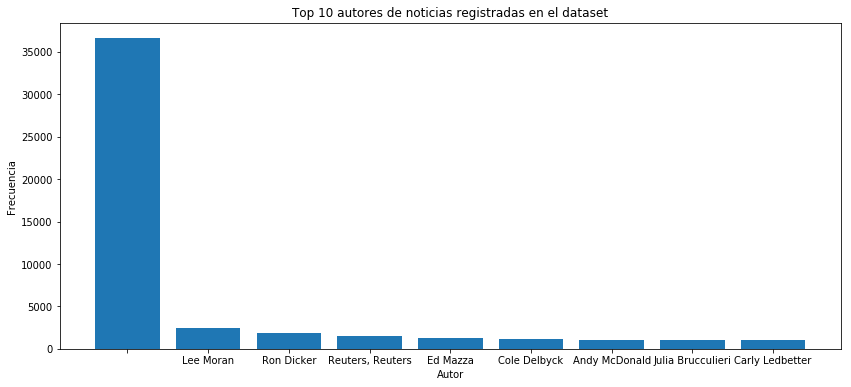

In [14]:
plt.figure(figsize=(14,6)) # tamaño del plot
plt.bar(top_authors.Autor, top_authors.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset')
plt.show()

In [15]:
pd.value_counts(df['authors'] == '')

False    164233
True      36620
Name: authors, dtype: int64

In [16]:
36620/ len(df)

0.18232239498538733

En el análisis se puede observar que se tienen **36620** registros sin el autor esto equivale al **18.23%** del total de los articulos por esta razón se procede a visualizar los datos sin tener en cuenta los valores que no tienen el autor

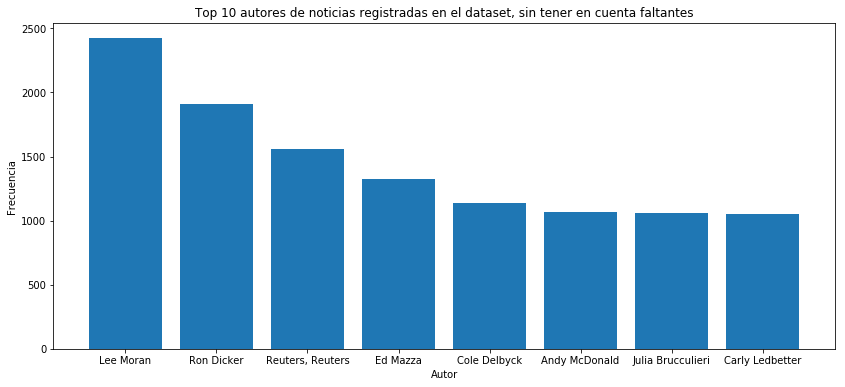

In [17]:
top_authors_nw = top_authors.iloc[1:10] # no se seleccionan los datos sin autor
plt.figure(figsize=(14,6)) # tamaño del plot
plt.bar(top_authors_nw.Autor, top_authors_nw.Frecuencia)
plt.xlabel('Autor')
plt.ylabel('Frecuencia')
plt.title('Top 10 autores de noticias registradas en el dataset, sin tener en cuenta faltantes')
plt.show()

#### Variable date

In [18]:
date = pd.DataFrame(df['date'])
date.head()

,date
0,2018-05-26
1,2018-05-26
2,2018-05-26
3,2018-05-26
4,2018-05-26


In [19]:
type(date)

pandas.core.frame.DataFrame

In [20]:
date['Freq'] = 1
date.index = date['date'] 
date = date.drop(columns=['date'])
date.head()

,Freq
date,
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1
2018-05-26,1


In [21]:
date_res_d = date.resample('D').count() # resample por día
date_res_d.head()

,Freq
date,
2012-01-28,66
2012-01-29,65
2012-01-30,100
2012-01-31,100
2012-02-01,100


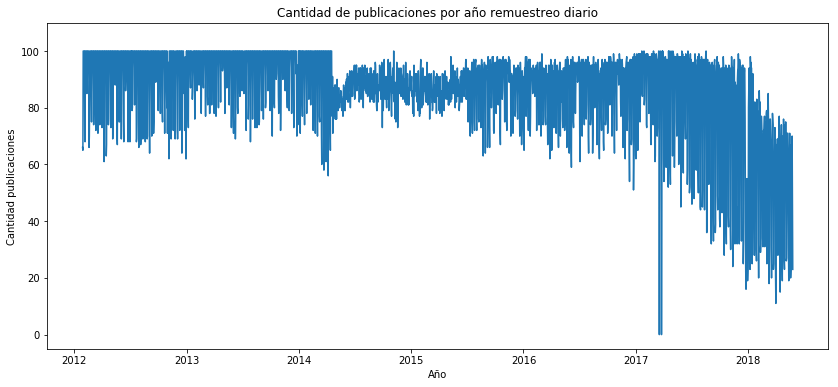

In [22]:
plt.figure(figsize=(14,6)) # tamaño del plot
plt.plot(date_res_d)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo diario')
plt.ylim([-5, 110])
plt.show()

In [23]:
date_res_m = date.resample('MS').count() # resample por mes
date_res_m.head()

,Freq
date,
2012-01-01,331
2012-02-01,2693
2012-03-01,2880
2012-04-01,2769
2012-05-01,2899


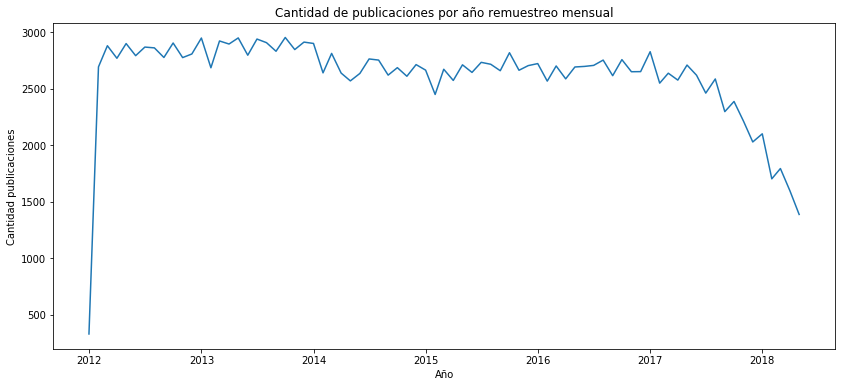

In [24]:
plt.figure(figsize=(14,6)) # tamaño del plot
plt.plot(date_res_m)
plt.xlabel('Año')
plt.ylabel('Cantidad publicaciones')
plt.title('Cantidad de publicaciones por año remuestreo mensual')
#plt.ylim([100, 700])
plt.show()

#### Frecuencias de la variable date por mes y por día

In [25]:
# buscar frecuendia por mes y por día
date_t = pd.DataFrame(df['date'])

In [26]:
date_t['Mes'] = pd.DatetimeIndex(date_t['date']).month_name()
date_t.head()

,date,Mes
0,2018-05-26,May
1,2018-05-26,May
2,2018-05-26,May
3,2018-05-26,May
4,2018-05-26,May


In [27]:
date_t_group = date_t
date_t_group = date_t_group.groupby(['Mes']).count()
date_t_group['Meses'] = date_t_group.index
date_t_group = date_t_group.reset_index(drop = True)
date_t_group

,date,Meses
0,17635,April
1,16576,August
2,15816,December
3,17286,February
4,16493,January
5,16470,July
6,16183,June
7,18418,March
8,17917,May
9,15756,November


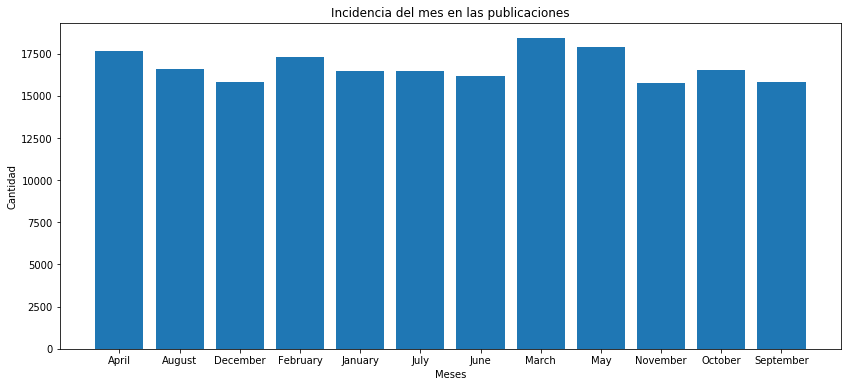

In [28]:
plt.figure(figsize=(14,6)) # tamaño del plot
plt.bar(date_t_group.Meses, date_t_group.date)
plt.xlabel('Meses')
plt.ylabel('Cantidad')
plt.title('Incidencia del mes en las publicaciones')
plt.show()